In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

# Import data

In [2]:
df=pd.read_csv("Part4 - batting_bowling_ipl_bat.csv")
df.shape

(180, 7)

In [3]:
def explore (x):
    
    print("\033[1m HEAD\n\033[0m",x.head())
    print("\033[1m\nTAIL\n\033[0m",x.tail())
    print("\033[1m\nDATA TYPES\n\033[0m",x.dtypes)
    print("\033[1m\nDESCRIBE\n\033[0m",x.describe())
    print("\033[1m\nMissing value is:\033[0m",x.isnull().values.any())
    print("\033[1m\nDupicate value is:\033[0m",x.duplicated().values.any())
    print("\033[1m\nShape of Dataset:\033[0m",x.shape)
    print("\033[1m\nSize of Dataset:\033[0m",x.size)
    print("\033[1m\nUnique values: \n", df.nunique())

In [4]:
explore(df)

 HEAD
         Name   Runs    Ave      SR  Fours  Sixes   HF
0        NaN    NaN    NaN     NaN    NaN    NaN  NaN
1   CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0
2        NaN    NaN    NaN     NaN    NaN    NaN  NaN
3  G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0
4        NaN    NaN    NaN     NaN    NaN    NaN  NaN

TAIL
             Name  Runs  Ave     SR  Fours  Sixes   HF
175  PC Valthaty  30.0  5.0  58.82    4.0    0.0  0.0
176          NaN   NaN  NaN    NaN    NaN    NaN  NaN
177     RP Singh   6.0  3.0  50.00    0.0    0.0  0.0
178          NaN   NaN  NaN    NaN    NaN    NaN  NaN
179     R Sharma   2.0  0.5  18.18    0.0    0.0  0.0

DATA TYPES
 Name      object
Runs     float64
Ave      float64
SR       float64
Fours    float64
Sixes    float64
HF       float64
dtype: object

DESCRIBE
              Runs        Ave          SR      Fours      Sixes         HF
count   90.000000  90.000000   90.000000  90.000000  90.000000  90.000000
mean   219.933333  24.729889  119

From the above analysis we can say that there are many NaN values in all the features. I see presence of outliers in Runs,HF and Sixes

Let's replace NaN values with median

In [5]:
df=df.dropna()

In [6]:
df.isnull().any()

Name     False
Runs     False
Ave      False
SR       False
Fours    False
Sixes    False
HF       False
dtype: bool

All the NaN values are dropped. Lets check for outliers now

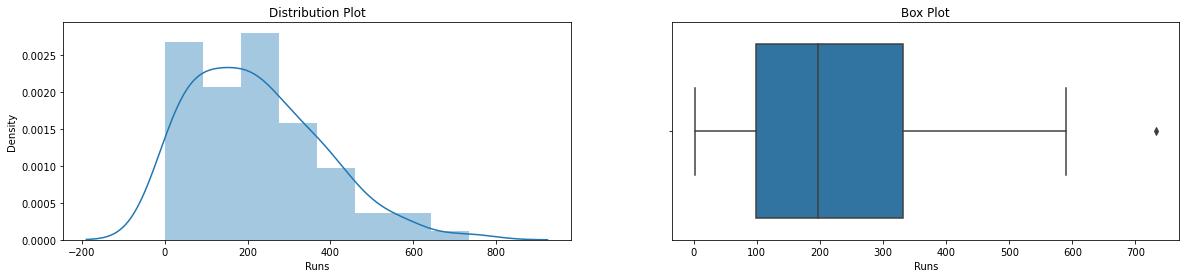

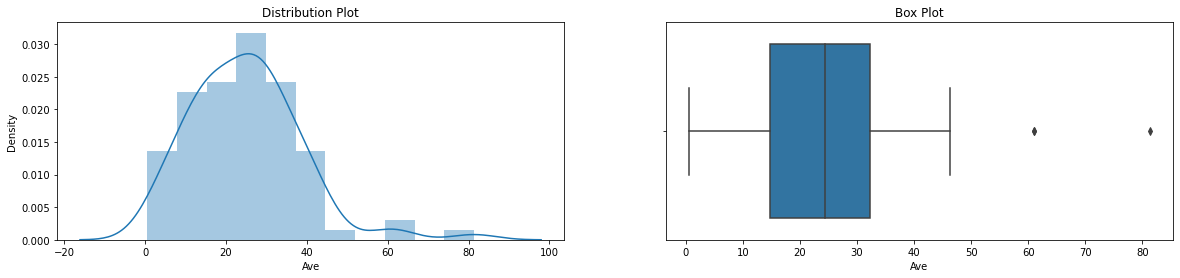

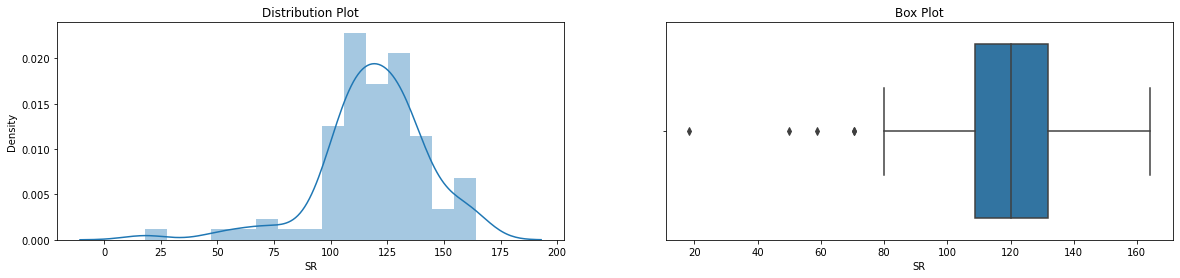

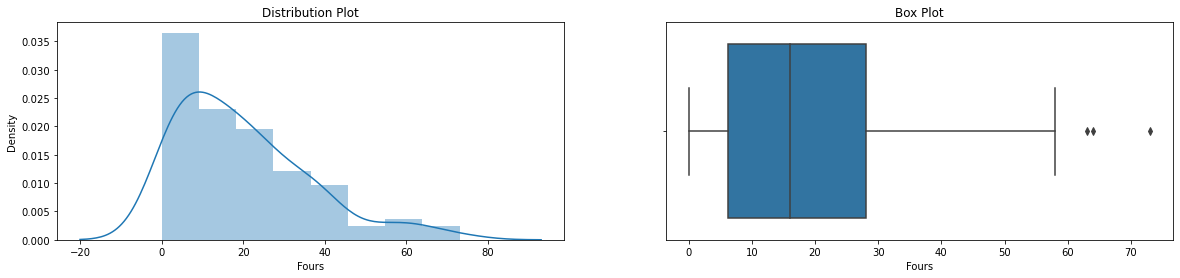

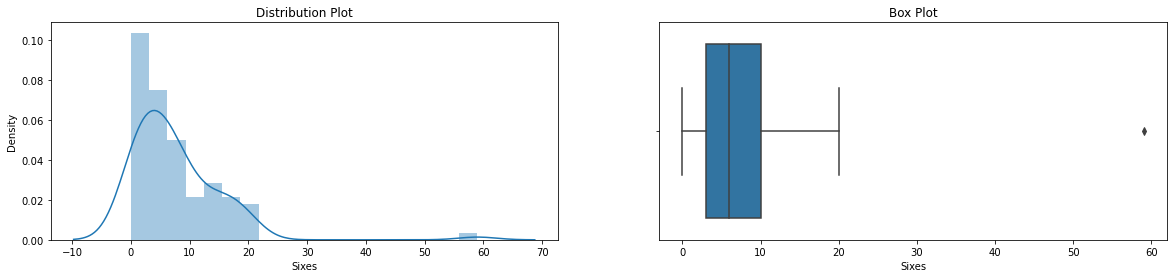

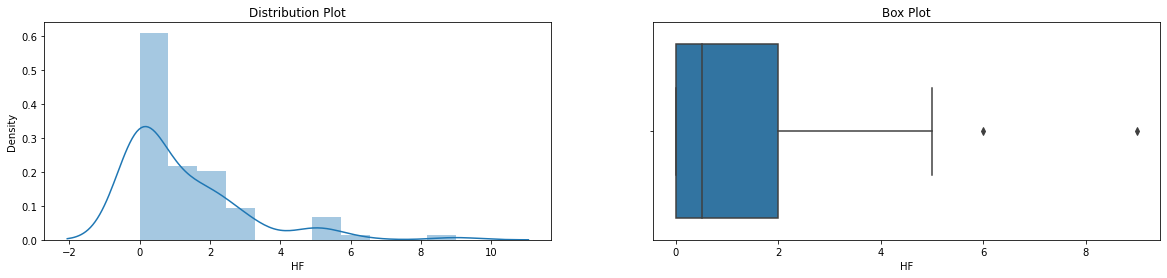

In [7]:
columns=['Runs','Ave','SR','Fours','Sixes','HF']
index=0
for i in range(len(columns)):
    fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
    fig.set_size_inches(20,4)
    sns.distplot(df[columns[index]],ax=ax1)
    ax1.set_title("Distribution Plot")

    sns.boxplot(df[columns[index]],ax=ax2)
    ax2.set_title("Box Plot")
    index=index+1

Seems like there are many ouliers in all the features. Lets take a count of them now and check if we can drop them.

In [8]:
col=['Runs','Ave','SR','Fours','Sixes','HF']
index=0
for i in range(len(col)):
    q1 = np.quantile(df[col[index]],0.25)
    q2 = np.quantile(df[col[index]],0.50)
    q3 = np.quantile(df[col[index]],0.75)
    IQR = q3-q1
    print("Quartie1::",q1)
    print("Quartie2::",q2)
    print("Quartie3::",q3)
    print("Inter Quartie Range::",IQR)
    #outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
    max=df[col[index]].quantile(0.75)+(1.5 * IQR)
    min=df[col[index]].quantile(0.25)-(1.5 * IQR)
    print("skewness above",df[col[index]].quantile(0.75)+(1.5 * IQR),"are outliers")
    print("skewness below",min,"are outliers")
    print("The Outliers in",col[index], "column are",df[df[col[index]]>max].shape[0])
    print("The Outliers in",col[index], "column are",df[df[col[index]]<min].shape[0])
                                                        
    df.drop(df[df[col[index]]>max].index,axis=0,inplace=True)
    df.drop(df[df[col[index]]<min].index,axis=0,inplace=True)
    index=index+1
    print("-------------------------------------------------------------------------------------------------")

Quartie1:: 98.0
Quartie2:: 196.5
Quartie3:: 330.75
Inter Quartie Range:: 232.75
skewness above 679.875 are outliers
skewness below -251.125 are outliers
The Outliers in Runs column are 1
The Outliers in Runs column are 0
-------------------------------------------------------------------------------------------------
Quartie1:: 14.5
Quartie2:: 24.44
Quartie3:: 30.92
Inter Quartie Range:: 16.42
skewness above 55.550000000000004 are outliers
skewness below -10.130000000000003 are outliers
The Outliers in Ave column are 2
The Outliers in Ave column are 0
-------------------------------------------------------------------------------------------------
Quartie1:: 108.485
Quartie2:: 120.0
Quartie3:: 131.27499999999998
Inter Quartie Range:: 22.789999999999978
skewness above 165.45999999999995 are outliers
skewness below 74.30000000000004 are outliers
The Outliers in SR column are 0
The Outliers in SR column are 5
--------------------------------------------------------------------------------

There are less outliers in all columns. Lets remove them

In [9]:
df_name=df['Name']
df=df.drop('Name',axis=1)

In [10]:
df.head()

,Runs,Ave,SR,Fours,Sixes,HF
5,495.0,33.00,161.23,57.0,19.0,5.0
7,479.0,43.54,149.68,41.0,20.0,5.0
9,569.0,40.64,129.61,58.0,18.0,5.0
15,433.0,30.92,126.60,39.0,18.0,5.0
17,319.0,39.87,161.11,26.0,15.0,3.0


In [11]:
df_name.head()

5           V Sehwag
7           CL White
9           S Dhawan
15         RG Sharma
17    AB de Villiers
Name: Name, dtype: object

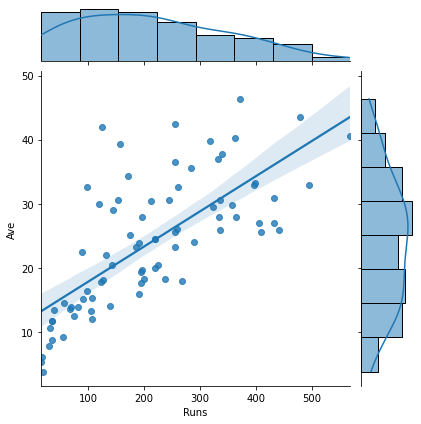

In [12]:
sns.jointplot(data=df, x="Runs", y="Ave", kind="reg")

Runs and Average score are positively corelated

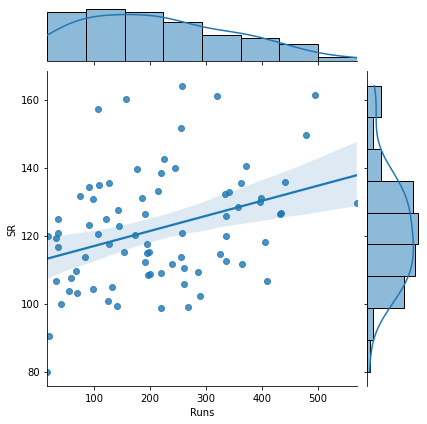

In [13]:
sns.jointplot(data=df, x="Runs", y="SR", kind="reg")

Strike rate and outliers are also positively correlated and have few outliers 

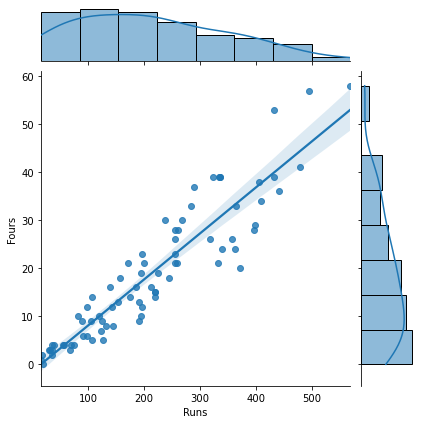

In [14]:
sns.jointplot(data=df, x="Runs", y="Fours", kind="reg")

Runs and number of Fours are also positively correlated with very few outliers

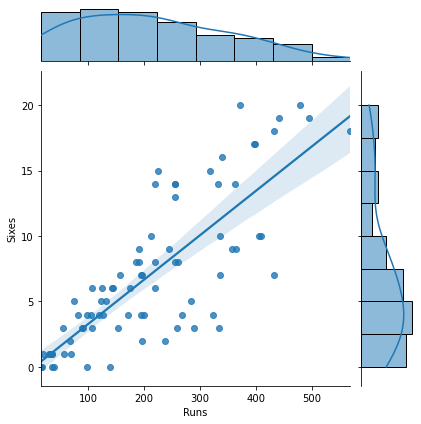

In [15]:
sns.jointplot(data=df, x="Runs", y="Sixes", kind="reg")

Runs and number of Sixes are also positively correlated with very few outliers

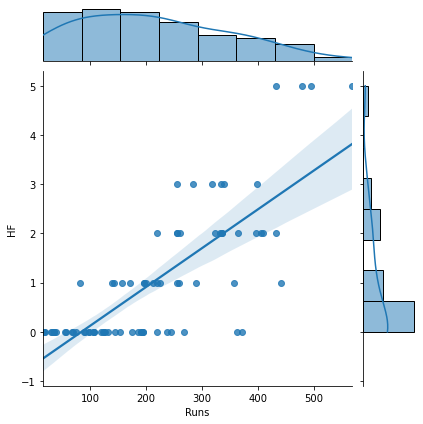

In [16]:
sns.jointplot(data=df, x="Runs", y="HF", kind="reg")

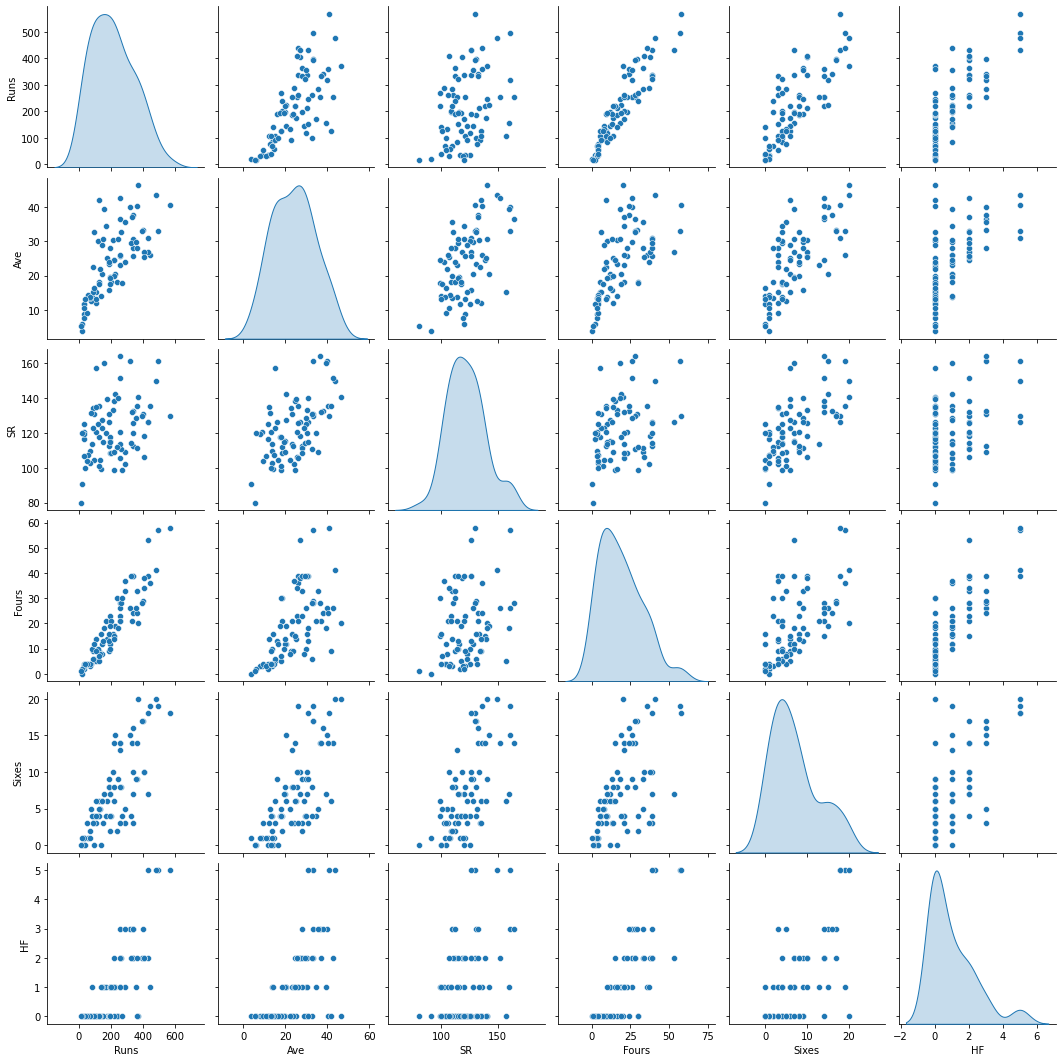

In [17]:
sns.pairplot(df, diag_kind='kde')

From the above figure we see 2 peaks and almost all the features are positively correlated

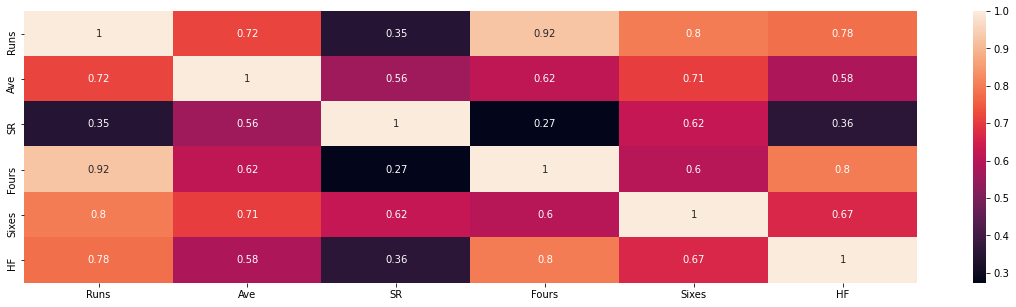

In [18]:
plt.figure(figsize=(20,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

Text(0.5, 1.0, 'Runs')

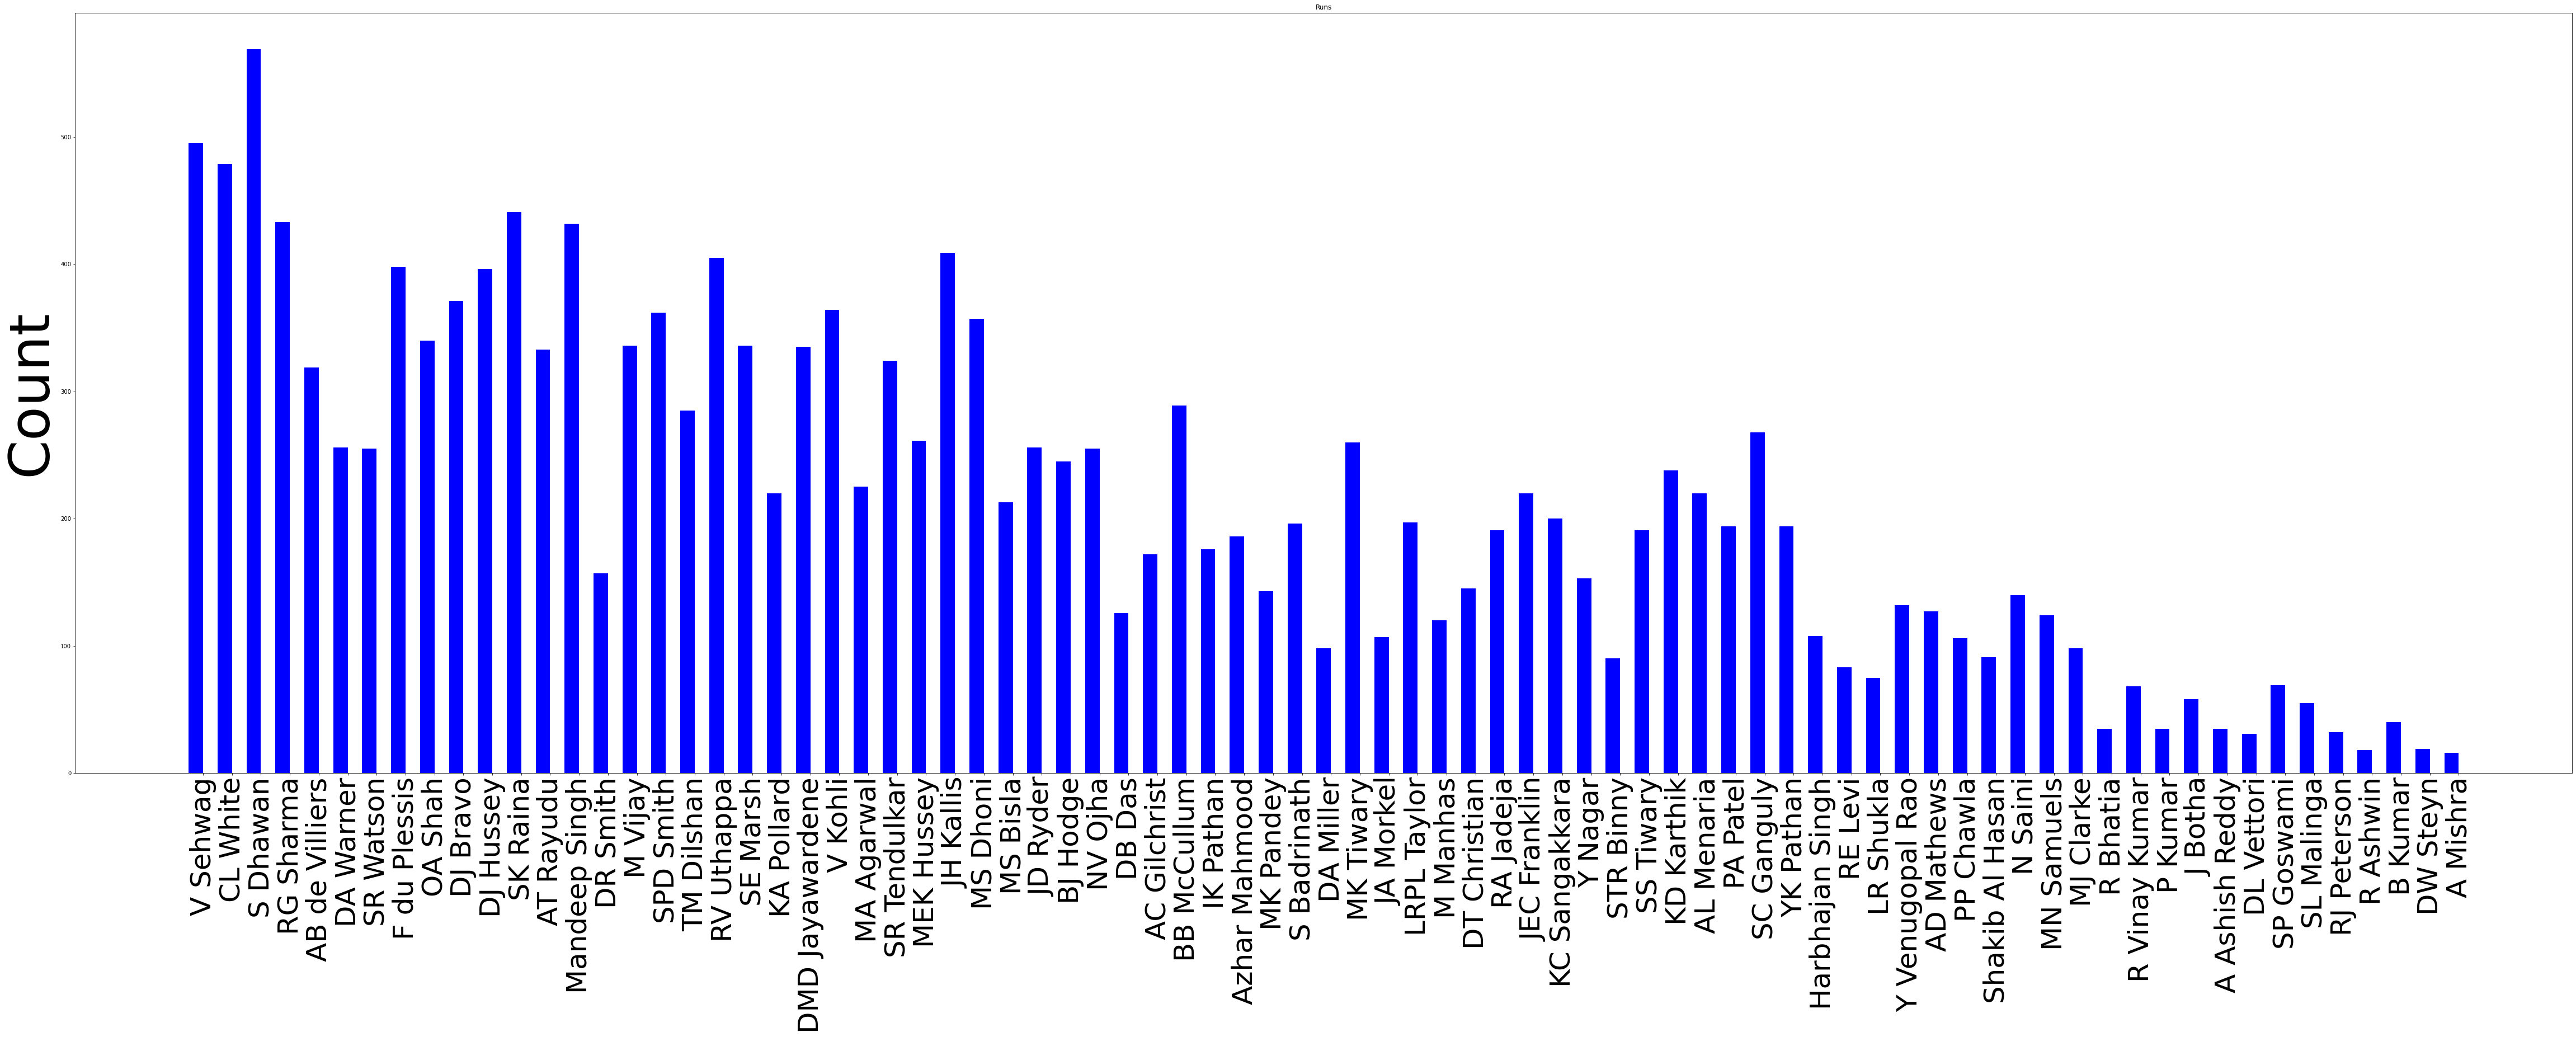

In [19]:
labels = np.array(df_name)
ind = np.arange(len(labels)) # making them as indexes
width = 0.5 # width of rectangle
fig, ax = plt.subplots() # for figure
fig.set_size_inches(80,25)
rects = ax.bar(ind, np.array(df['Runs']), width=width, color='blue')# here ind is X
ax.set_xticks(ind+((width)/2.))# this is to define the postion in x axis 
ax.set_xticklabels(labels, rotation='vertical',fontsize=50) # this is for label x axis
ax.set_ylabel("Count",fontsize=100)
ax.set_title("Runs")

Text(0.5, 1.0, 'Average')

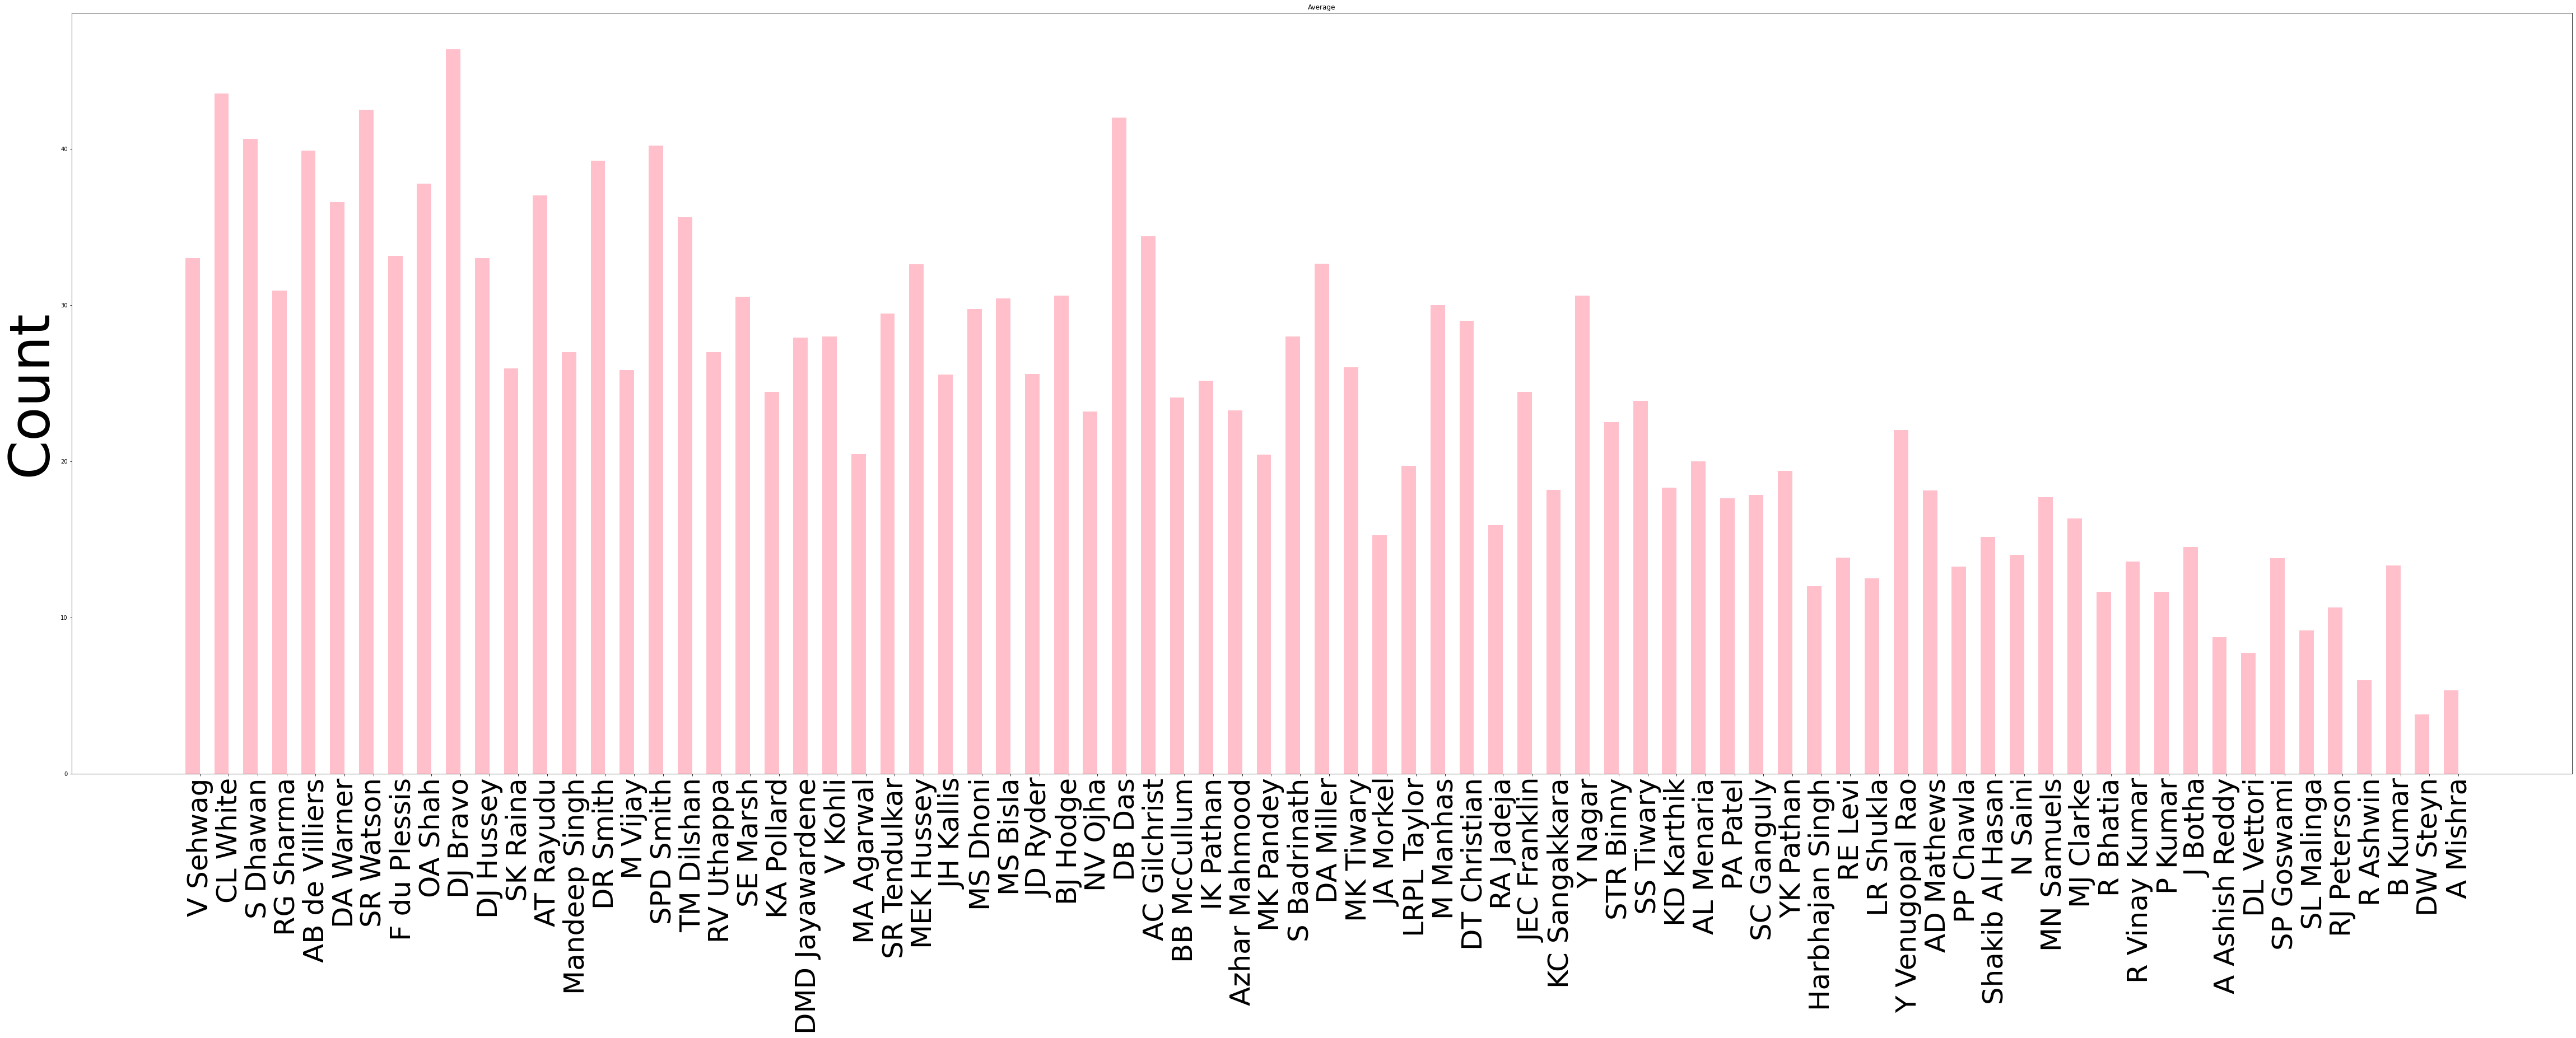

In [20]:
labels = np.array(df_name)
ind = np.arange(len(labels)) # making them as indexes
width = 0.5 # width of rectangle
fig, ax = plt.subplots() # for figure
fig.set_size_inches(80,25)
rects = ax.bar(ind, np.array(df['Ave']), width=width, color='Pink')# here ind is X
ax.set_xticks(ind+((width)/2.))# this is to define the postion in x axis 
ax.set_xticklabels(labels, rotation='vertical',fontsize=50) # this is for label x axis
ax.set_ylabel("Count",fontsize=100)
ax.set_title("Average")

Text(0.5, 1.0, 'SR')

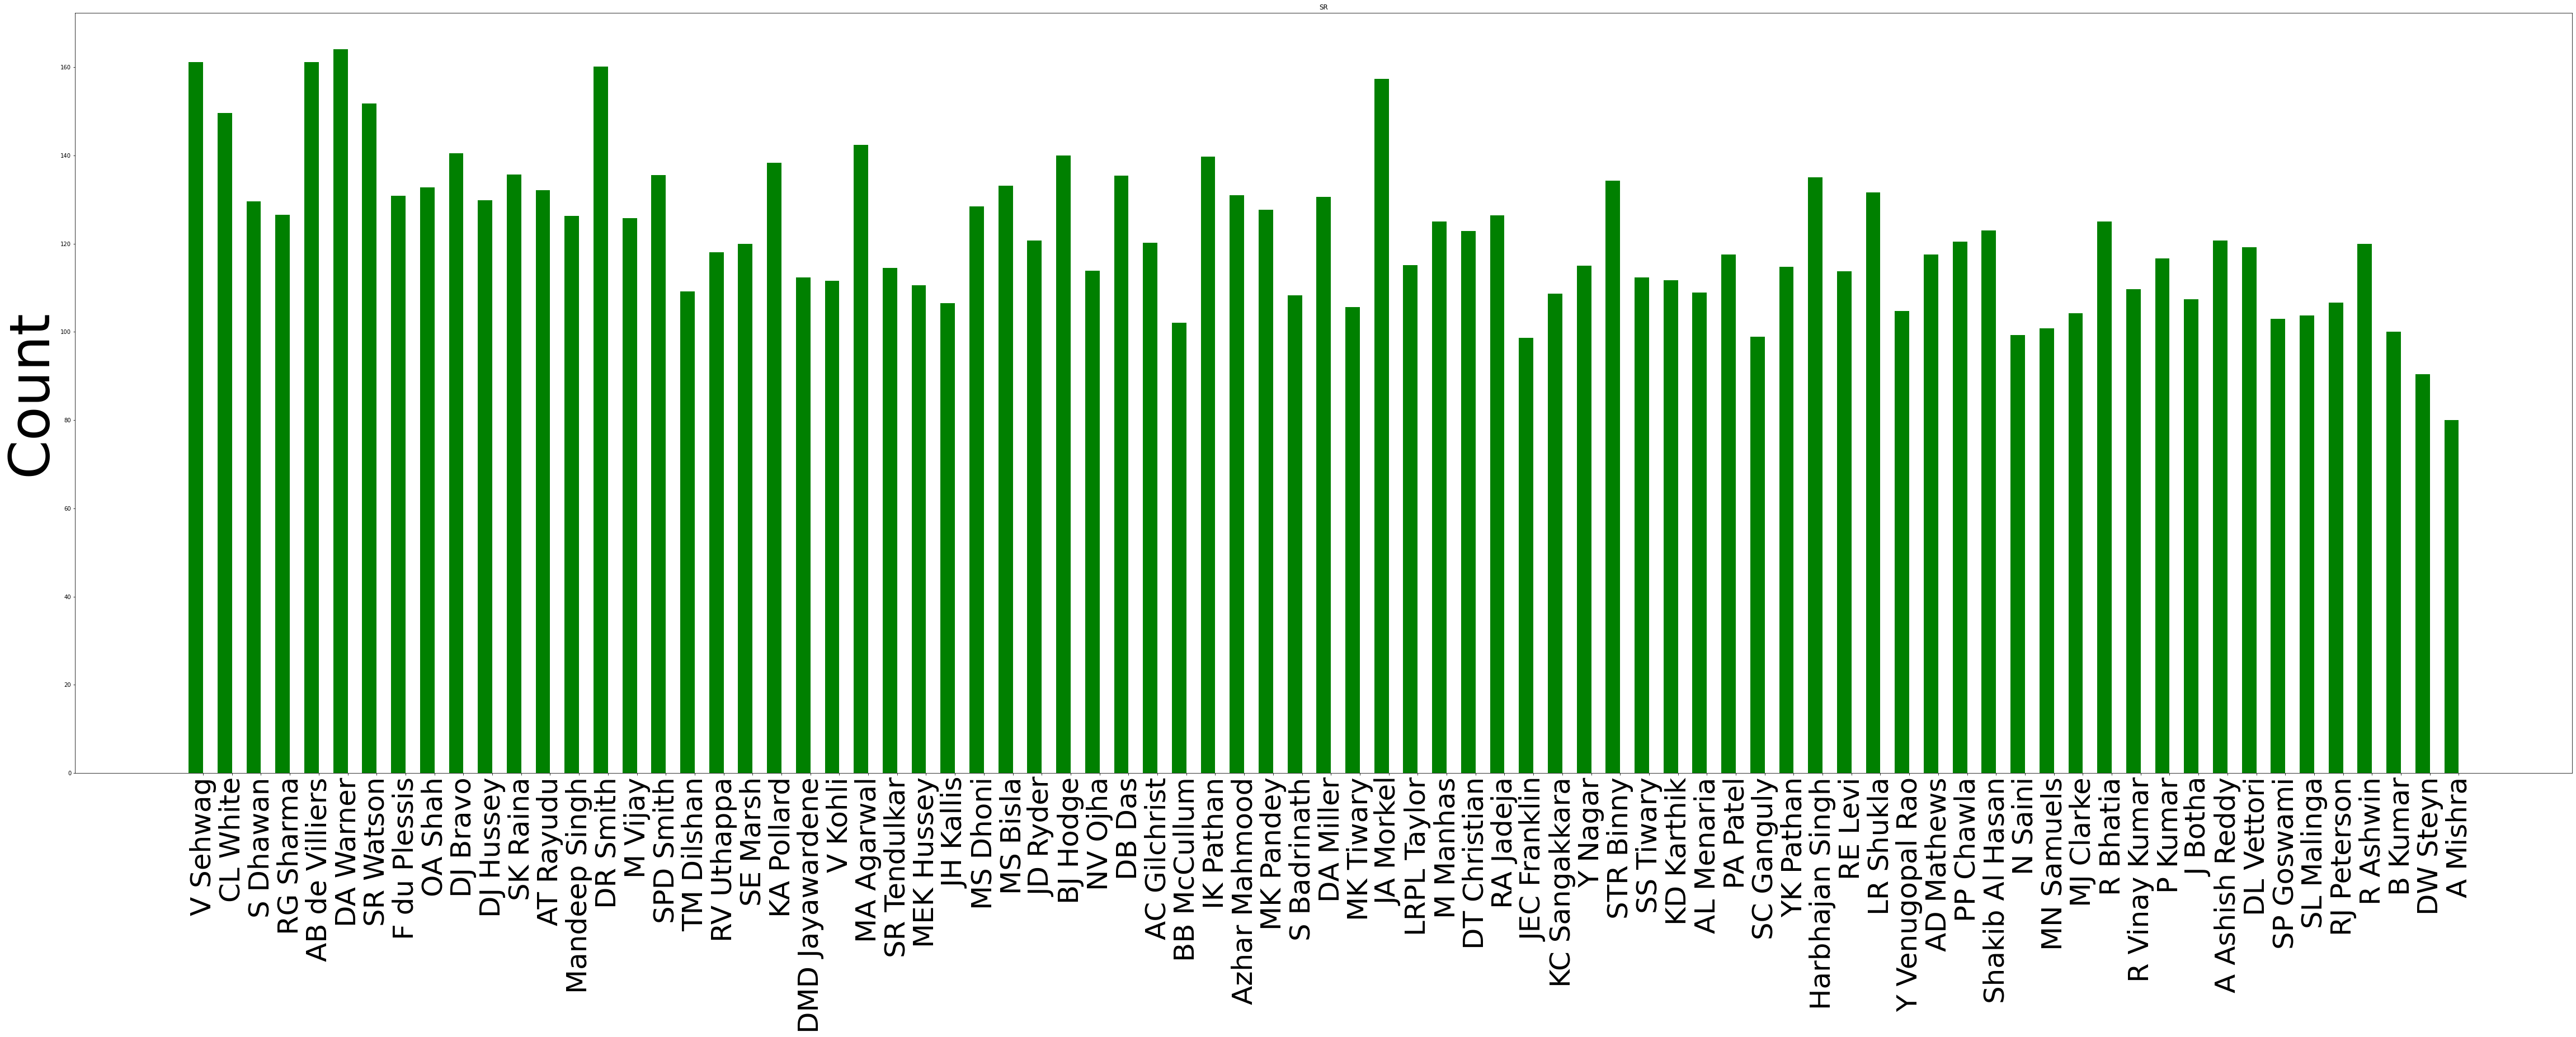

In [21]:
labels = np.array(df_name)
ind = np.arange(len(labels)) # making them as indexes
width = 0.5 # width of rectangle
fig, ax = plt.subplots() # for figure
fig.set_size_inches(80,25)
rects = ax.bar(ind, np.array(df['SR']), width=width, color='green')# here ind is X
ax.set_xticks(ind+((width)/2.))# this is to define the postion in x axis 
ax.set_xticklabels(labels, rotation='vertical',fontsize=50) # this is for label x axis
ax.set_ylabel("Count",fontsize=100)
ax.set_title("SR")

Text(0.5, 1.0, 'Fours')

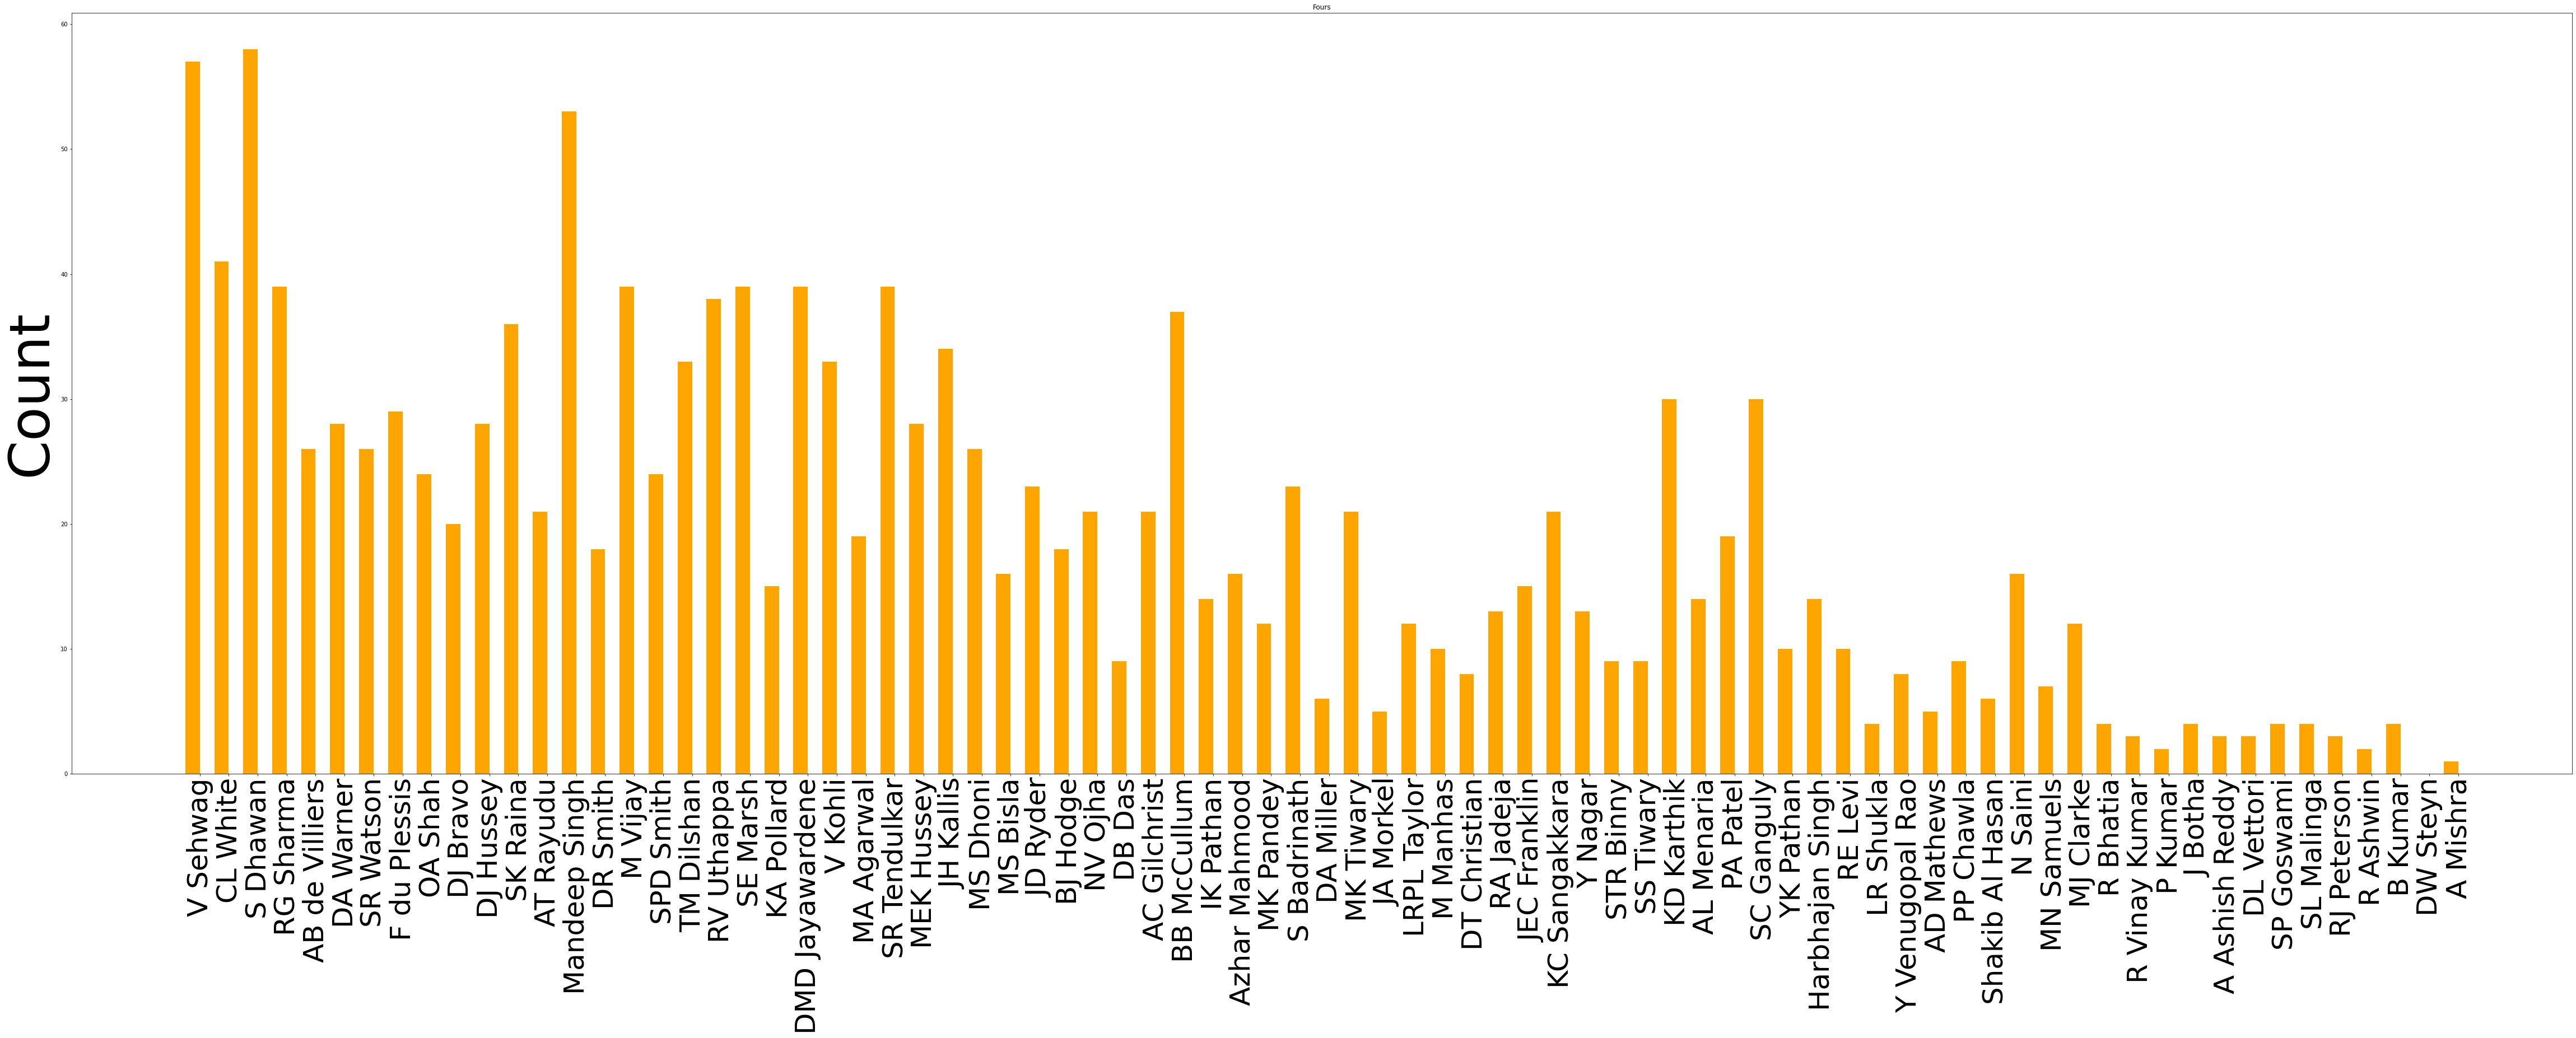

In [22]:
labels = np.array(df_name)
ind = np.arange(len(labels)) # making them as indexes
width = 0.5 # width of rectangle
fig, ax = plt.subplots() # for figure
fig.set_size_inches(80,25)
rects = ax.bar(ind, np.array(df['Fours']), width=width, color='Orange')# here ind is X
ax.set_xticks(ind+((width)/2.))# this is to define the postion in x axis 
ax.set_xticklabels(labels, rotation='vertical',fontsize=50) # this is for label x axis
ax.set_ylabel("Count",fontsize=100)
ax.set_title("Fours")

Text(0.5, 1.0, 'Sixes')

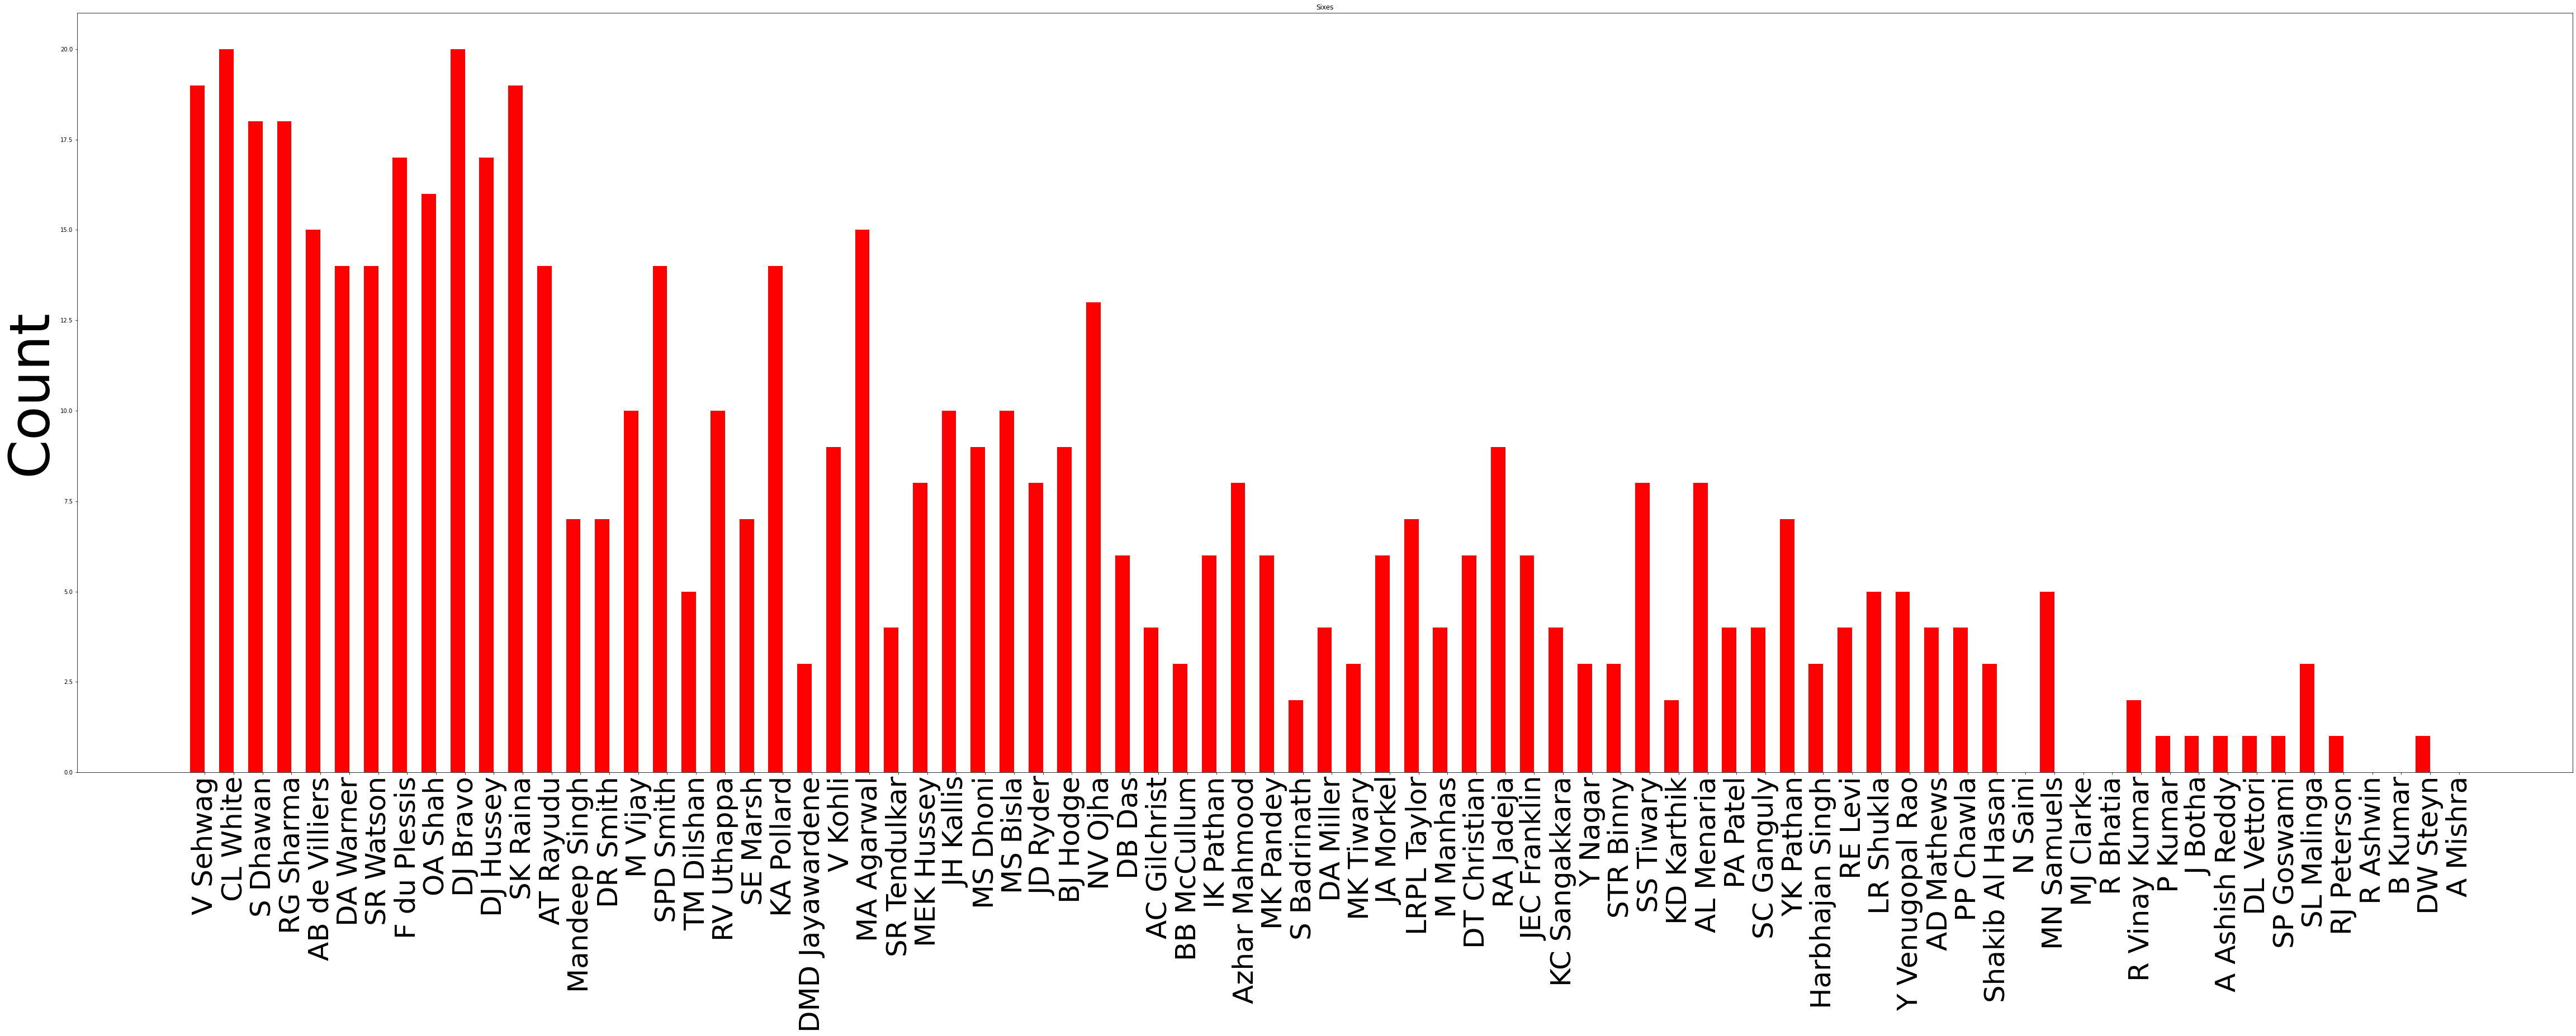

In [23]:
labels = np.array(df_name)
ind = np.arange(len(labels)) # making them as indexes
width = 0.5 # width of rectangle
fig, ax = plt.subplots() # for figure
fig.set_size_inches(80,25)
rects = ax.bar(ind, np.array(df['Sixes']), width=width, color='Red')# here ind is X
ax.set_xticks(ind+((width)/2.))# this is to define the postion in x axis 
ax.set_xticklabels(labels, rotation='vertical',fontsize=50) # this is for label x axis
ax.set_ylabel("Count",fontsize=100)
ax.set_title("Sixes")

Text(0.5, 1.0, 'HF')

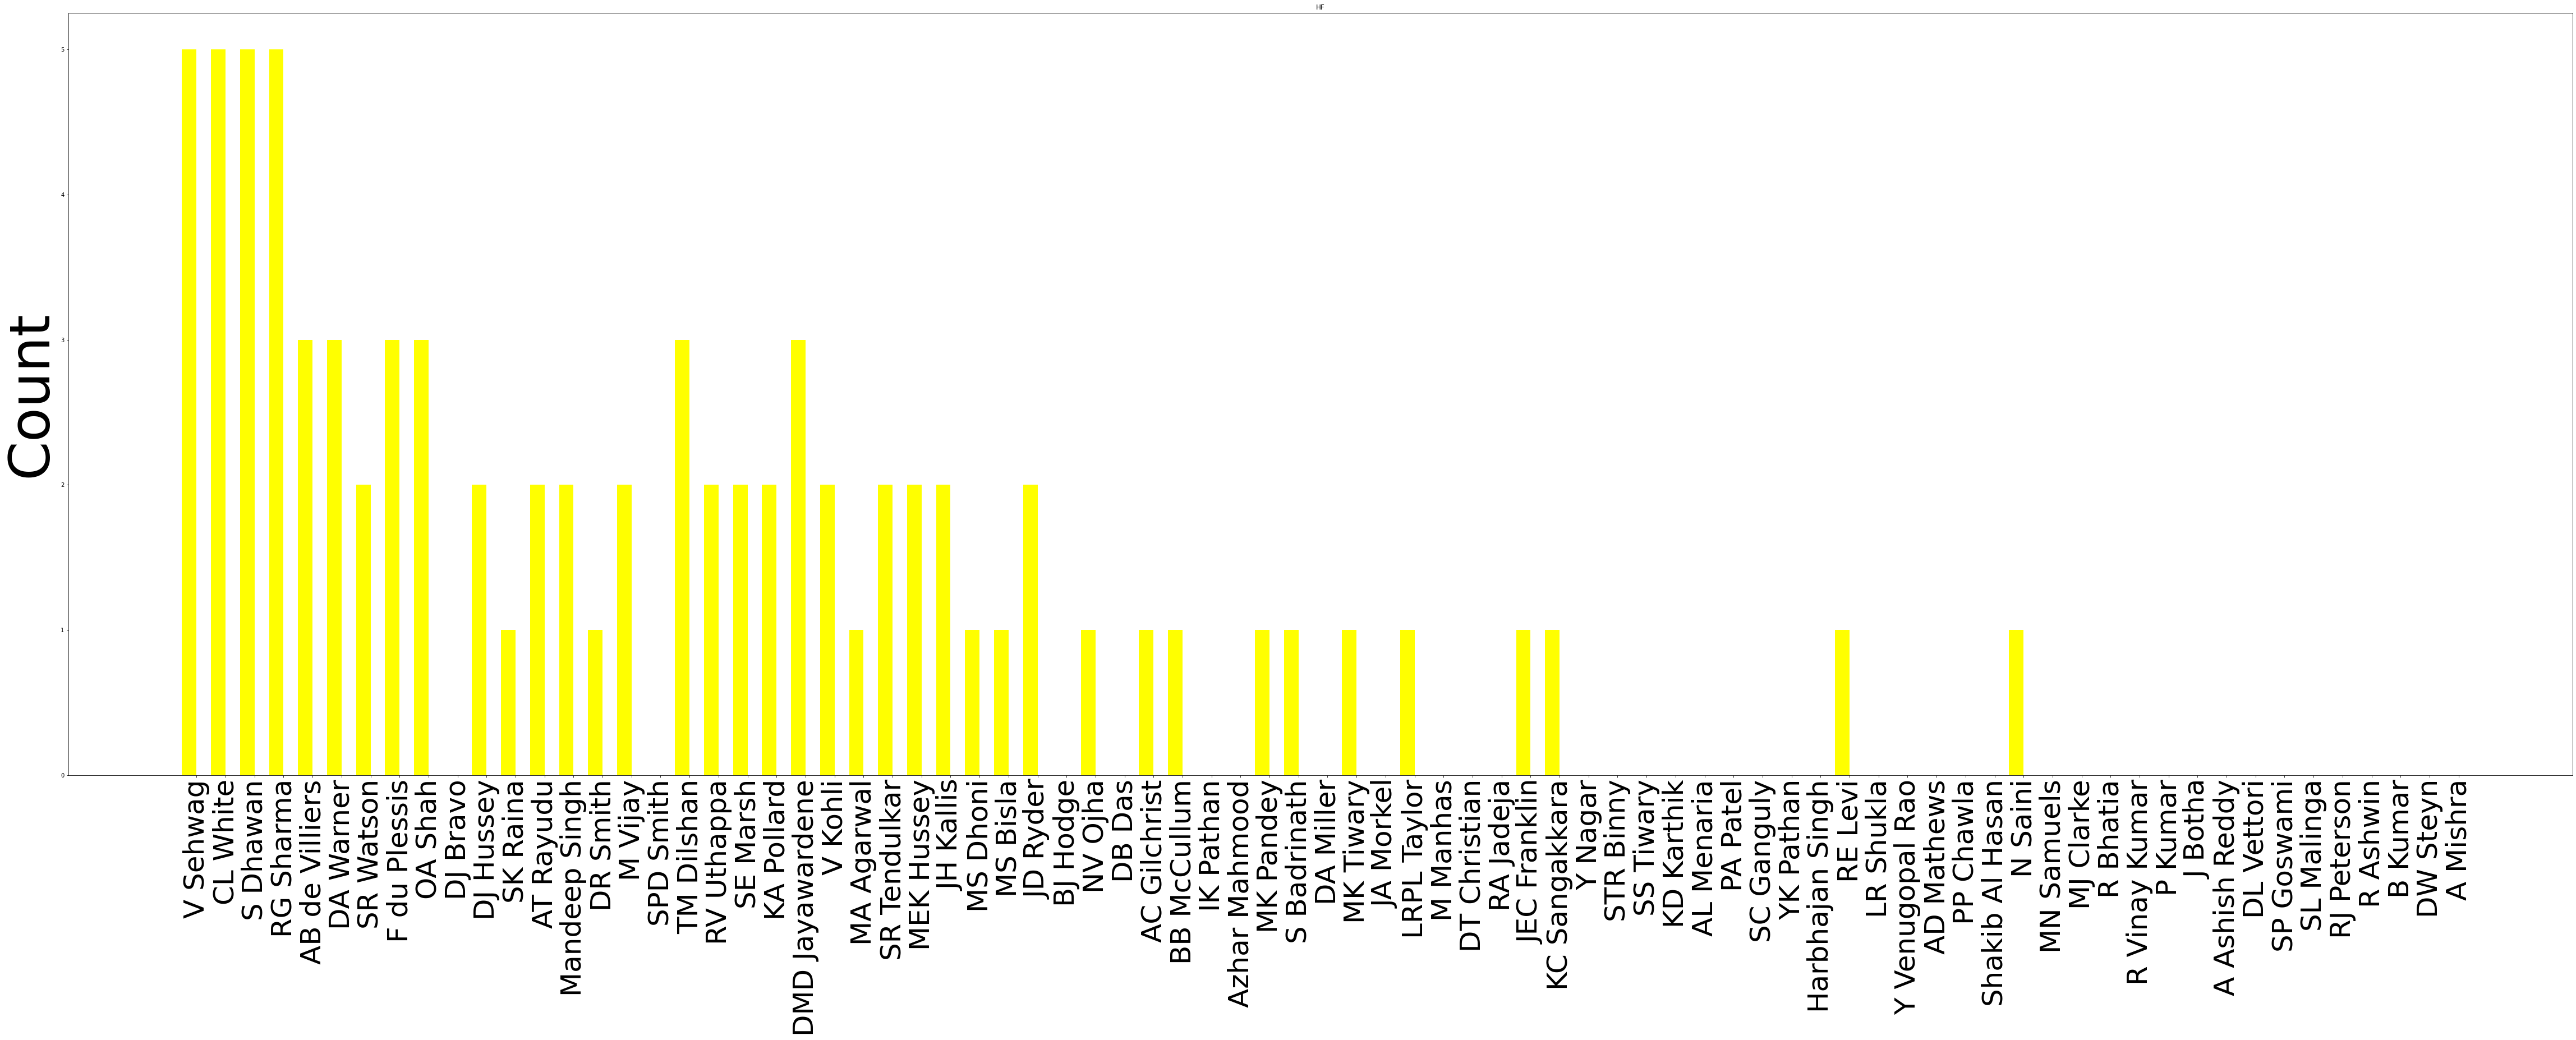

In [24]:
labels = np.array(df_name)
ind = np.arange(len(labels)) # making them as indexes
width = 0.5 # width of rectangle
fig, ax = plt.subplots() # for figure
fig.set_size_inches(80,25)
rects = ax.bar(ind, np.array(df['HF']), width=width, color='Yellow')# here ind is X
ax.set_xticks(ind+((width)/2.))# this is to define the postion in x axis 
ax.set_xticklabels(labels, rotation='vertical',fontsize=50) # this is for label x axis
ax.set_ylabel("Count",fontsize=100)
ax.set_title("HF")

# Doing PCA on the data set

In [25]:
from scipy.stats import zscore
df_Scaled = df.apply(zscore)

In [26]:
cov_matrix = np.cov(df_Scaled,rowvar=False)
print("cov_matrix shape:",cov_matrix.shape)
print("Covariance_matrix",cov_matrix)

cov_matrix shape: (6, 6)
Covariance_matrix [[1.01282051 0.7278425  0.35146208 0.93562151 0.80963806 0.78859311]
 [0.7278425  1.01282051 0.56813158 0.62304804 0.7156665  0.5911127 ]
 [0.35146208 0.56813158 1.01282051 0.27672718 0.63278019 0.36179507]
 [0.93562151 0.62304804 0.27672718 1.01282051 0.60779544 0.81111719]
 [0.80963806 0.7156665  0.63278019 0.60779544 1.01282051 0.67362593]
 [0.78859311 0.5911127  0.36179507 0.81111719 0.67362593 1.01282051]]


In [27]:
from sklearn.decomposition import PCA
pca_one_components = PCA(n_components=1)
pca_one_components.fit(df_Scaled)

PCA(n_components=1)

In [28]:
df_new_pca = pca_one_components.transform(df_Scaled)
df_new_pca.shape

(79, 1)

In [29]:
df_pca=pd.DataFrame(df_new_pca)
df_pca.head()

,0
0,5.358963
1,5.113683
2,5.335851
3,3.828885
4,3.132545


In [30]:
df_pca= pd.concat([df_name.reset_index(drop=True),df_pca.reset_index(drop=True)], axis=1)
df_pca.head()

,Name,0
0,V Sehwag,5.358963
1,CL White,5.113683
2,S Dhawan,5.335851
3,RG Sharma,3.828885
4,AB de Villiers,3.132545


In [31]:
df_pca.sort_values(by=0,inplace=True, ascending=False)
print(df_pca)

              Name         0
0         V Sehwag  5.358963
2         S Dhawan  5.335851
1         CL White  5.113683
3        RG Sharma  3.828885
4   AB de Villiers  3.132545
..             ...       ...
74     RJ Peterson -2.711808
76         B Kumar -2.736235
75        R Ashwin -2.827852
77        DW Steyn -3.406857
78        A Mishra -3.581302

[79 rows x 2 columns]


From the above result we can rank the cricketers accordingly. V Sehwag ranked No.1, S Dhawan ranks No.2, CL White ranks No.3 and so on